In [14]:
!pip install lasio
import pandas as pd
import matplotlib.pyplot as plt
import lasio

In [15]:
las = lasio.read("15-9-19_SR_COMP.LAS")

In [16]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [ ]:
las.sections['Version']

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS Log ASCII Standa"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste")]

In [17]:
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")

Top Depth (STRT): 		 102.1568
Bottom Depth (STOP): 		 4636.514
Depth Increment (STEP): 		 0.1524
Null Value (NULL): 		 -999.25
Field Name (FLD): 		 Q15
NAME (WELL): 		 15/9-19
WELLBORE (WBN): 		 15/9-19 SR
COUNTRY (NATI): 		 NOR
COUNTRY (CTRY): 		 NOR
OPERATOR (COMP): 		 STATOIL
PERM DATUM (PDAT): 		 MSL
RIG NAME (COUN): 		 NORTH SEA
STATE (STAT): 		 NORWAY
PB WELL ID (PBWE): 		 15/9-19
PB WELLBORE ID (APIN): 		 15/9-19 SR
PB WELL NAME SET (PBWS): 		 ALL


In [18]:
las.well.WELL.value

'15/9-19'

In [19]:
for curve in las.curves:
    print(curve.mnemonic)

DEPT
AC
CALI
DEN
GR
NEU
RDEP
RMED


In [20]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, 	 Units: M, 	 Description: 1  DEPTH
Curve: AC, 	 Units: US/F, 	 Description: 2  Sonic Transit Time (Slowness)
Curve: CALI, 	 Units: IN, 	 Description: 3  Caliper
Curve: DEN, 	 Units: G/CC, 	 Description: 4  Bulk Density
Curve: GR, 	 Units: GAPI, 	 Description: 5  Gamma Ray
Curve: NEU, 	 Units: %, 	 Description: 6  Neutron Porosity
Curve: RDEP, 	 Units: OHMM, 	 Description: 7  Deep Resistivity
Curve: RMED, 	 Units: OHMM, 	 Description: 8  Medium Resistivity
There are a total of: 8 curves present within this file


In [21]:
las.delete_curve('RMED')

In [22]:
las.write('15_9-19_Exported.las')

In [23]:
well = las.df()

In [ ]:
well.head()

In [24]:
well.describe()

,AC,CALI,DEN,GR,NEU,RDEP
count,6579.000000,6579.000000,6656.000000,6689.000000,6668.000000,6701.000000
mean,78.313607,9.550656,2.459291,36.048563,17.986061,3.221012
std,17.009535,0.906267,0.162682,26.705519,11.694084,8.860387
min,1.025100,6.000000,2.037700,2.766100,2.178300,0.250300
25%,66.169300,9.142900,2.341250,14.852300,10.244475,0.800600
50%,74.145900,9.523800,2.514200,32.142600,15.245100,1.770000
75%,89.024250,9.904800,2.589800,50.901700,22.952525,3.394000
max,149.218700,20.285700,3.001300,304.333700,146.347400,198.537100


In [25]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6701 entries, 3615.434 to 4636.514
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      6579 non-null   float64
 1   CALI    6579 non-null   float64
 2   DEN     6656 non-null   float64
 3   GR      6689 non-null   float64
 4   NEU     6668 non-null   float64
 5   RDEP    6701 non-null   float64
dtypes: float64(6)
memory usage: 366.5 KB


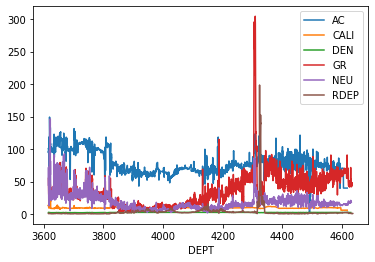

In [26]:
well.plot()

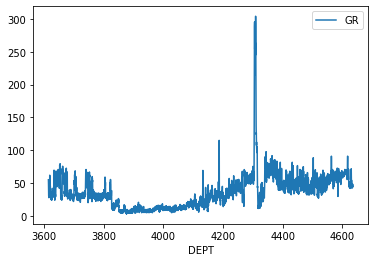

In [27]:
well.plot(y='GR')

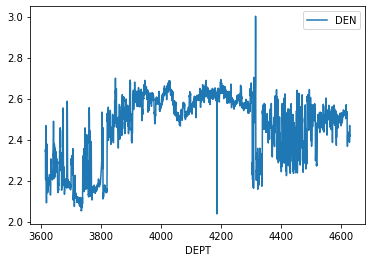

In [28]:
well.plot(y='DEN')